In [32]:
import numpy as np
from scipy import stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


In [19]:
import pymc3 as pm

In [29]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)

C:\Users\hjunk\Anaconda3\lib\site-packages\theano\tensor\basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [30]:
with model:
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start)

Optimization terminated successfully.
         Current function value: 3.819085
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10437.62it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E361B140F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E361E7EB00>]], dtype=object)

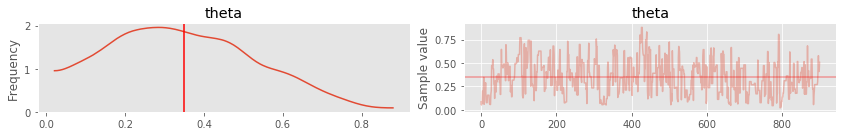

In [33]:
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta':theta_real})

In [ ]:
with model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step, njobs=4)

In [ ]:
burnin = 0
mult_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real})